In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Guassian Quadrature

In [247]:
""" From "COMPUTATIONAL PHYSICS", 3rd Ed, Enlarged Python eTextBook  
    by RH Landau, MJ Paez, and CC Bordeianu
    Copyright Wiley-VCH Verlag GmbH & Co. KGaA, Berlin;  Copyright R Landau,
    Oregon State Unv, MJ Paez, Univ Antioquia, C Bordeianu, Univ Bucharest, 2015.
    Support by National Science Foundation"""

# IntegGauss.py: Gaussian quadrature generator of pts & wts
 
from numpy import *
from sys import version    

w = zeros((2001), float)
x = zeros((2001), float)

def gauss(npts, job, a, b, x, w): # # a, b are lower and upper bound for the integration, job is three different mapping in the book
    m  = i = j = t = t1 = pp = p1 = p2 = p3 = 0.  
    eps = 3.E-15                  # Accuracy: Can be Adjusted !
    m = int((npts + 1)/2 )
    for i in range(1, m + 1):
        t = cos(math.pi*(float(i) - 0.25)/(float(npts) + 0.5) ) # initial guess of x_i
        t1 = 1 
        while( (abs(t - t1) ) >= eps):  # iteration until it converges 
            p1 = 1. ;  p2 = 0.  
            for j in range(1, npts + 1):
                p3 = p2;   p2 = p1 
                p1 = ((2.*float(j)-1)*t*p2 - (float(j)-1.)*p3)/(float(j)) # Pn using recurrence relation
            pp = npts*(t*p1 - p2)/(t*t - 1.)  # derivative using recurrence relation 
            t1 = t; t = t1  -  p1/pp       # interation to get x_i using Newton-Raphson method
        x[i - 1] = - t;   x[npts - i] = t 
        w[i - 1] = 2./( (1. - t*t)*pp*pp) 
        w[npts - i] = w[i - 1]  
    if (job == 0):
        for i in range(0, npts):
            x[i] = x[i]*(b - a)/2. + (b + a)/2. 
            w[i] = w[i]*(b - a)/2. 
    if (job == 1):
        for i in range(0, npts):
            xi   = x[i]
            x[i] = a*b*(1. + xi) / (b + a - (b - a)*xi) 
            w[i] = w[i]*2.*a*b*b/( (b + a - (b-a)*xi)*(b + a - (b-a)*xi))
    if (job == 2):
        for i in range(0, npts):
            xi = x[i]
            x[i] = (b*xi +  b + a + a) / (1. - xi) 
            w[i] = w[i]*2.*(a + b)/( (1. - xi)*(1. - xi) )
            
def gaussint (no, min, max, f):
    quadra = 0.  
    gauss (no, 0, min, max, x, w)                     # Returns pts & wts
    for n in  range(0, no):
        quadra   += f(x[n]) * w[n]                   # Calculate integral
    return (quadra)                   

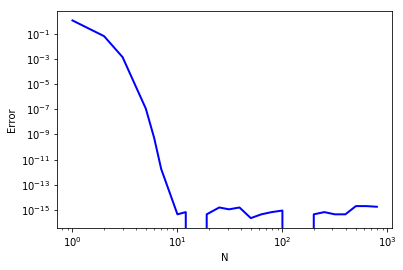

In [248]:
narr2=np.array([])
yarr3=np.array([])

for i in 10**np.arange(0,3,0.1):
    y=gaussint(int(i),0,np.pi,np.sin)
    narr2=np.append(narr2,int(i))
    yarr3=np.append(yarr3,y)
plt.plot(narr2, np.abs(yarr3-2.), 'b-', lw=2)   

plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

In [249]:
n=8
error=pow(3.14,(2*n+1))*pow(np.math.factorial(n),4)/(2*n+1)/pow(np.math.factorial(2*n),3)
print(error)

4.75968715449e-15


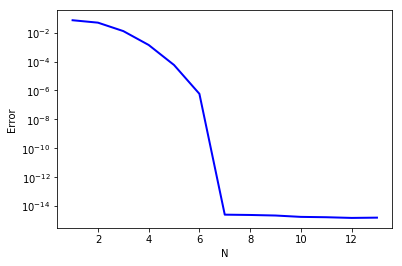

In [250]:
def f13(x):
    return pow(x, 13.)

narr2=np.array([])
yarr3=np.array([])

for i in np.arange(1,14):
    y=gaussint(int(i),0,1.,f13)
    narr2=np.append(narr2,int(i))
    yarr3=np.append(yarr3,y)
plt.plot(narr2, np.abs(yarr3-1./14.), 'b-', lw=2)   
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.show()

#  2
# Homework: using Newton-Raphson method to solve above equation arrays
# Hint: first you need to derive the partical derivative of the equation arrays. You can do it either 
# analytically by hand or numerically using method we learned in the last lecture.

In [9]:
def f1(x):
    return (10.-x*x)/x

def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x

Text(0,0.5,'x2')

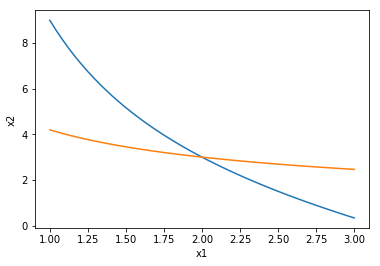

In [16]:
xs = np.linspace(1,3)
plt.plot(xs, f1(xs))
plt.plot(xs, f2(xs))
plt.xlabel("x1")
plt.ylabel("x2")

In [3]:
def f(x):
    f0=x[0]*x[0]+x[0]*x[1]-10.
    f1=x[1]+3.*x[0]*x[1]*x[1]-57.
    return np.array([f0,f1])

def dF(x0,dx):
    f00, f10 = (f([x0[0]+dx/2.,x0[1]])-f([x0[0]-dx/2.,x0[1]]))/dx
    f01, f11 = (f([x0[0],x0[1]+dx/2.])-f([x0[0],x0[1]-dx/2.]))/dx
    return np.array([[f00, f01], [f10, f11]])    

In [216]:
x0 = [0.1, 0]
df = dF(x0, 1e-6)

In [217]:
df

array([[0.2, 0.1],
       [0. , 1. ]])

In [199]:
f(x0)
dfinv = np.linalg.inv(df)
dxt = -np.matrix.dot(dfinv, f(x0))
x0 = x0+dxt

In [225]:
def newtonraphsonbacktracking(x0,dx,Nmax, eps,f):
    for i in range(0,Nmax):        
        df = dF(x0, dx)
        dfinv = np.linalg.inv(df)
        dxt = -np.matrix.dot(dfinv, f(x0))
        while np.sum(abs(f(x0+dxt)) > abs(f(x0))) > 0:
            if abs(f(x0+dxt))[0] > abs(f(x0))[0]:
                dxt[0]=dxt[0]/2.
            else:
                dxt[1]=dxt[1]/2.
                      
        x0 = x0+dxt
        print(x0,dxt,f(x0),df)
        if(abs(f(x0)[0])<eps and abs(f(x0)[1])<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)[0]), abs(f(x0)[1]))
            break
    return x0

In [228]:
roots = newtonraphsonbacktracking([6.,3.01], 1e-6, 750, 1e-6, f)
print (roots)

(array([3.18356495, 2.71244833]), array([-2.81643505, -0.29755167]), array([ 8.77034127, 15.98050098]), array([[ 15.00999998,   6.        ],
       [ 27.18029998, 109.36000001]]))
(array([2.17608322, 2.83092178]), array([-1.00748173,  0.11847345]), array([ 0.8956596 , -1.85091413]), array([[ 9.07957824,  3.18356496],
       [22.07212782, 52.81153268]]))
(array([2.00351233, 2.98897289]), array([-0.17257089,  0.1580511 ]), array([ 0.00250569, -0.31313657]), array([[ 7.18308823,  2.17608322],
       [24.04235441, 37.9619284 ]]))
(array([1.99999489, 3.00000465]), array([-0.00351744,  0.01103177]), array([-2.64311675e-05,  3.43011915e-05]), array([[ 6.99599755,  2.00351233],
       [26.80187676, 36.9306642 ]]))
(array([2., 3.]), array([ 5.10515582e-06, -4.65245930e-06]), array([ 2.30393482e-12, -2.97596614e-10]), array([[ 6.99999444,  1.9999949 ],
       [27.00008374, 36.99996395]]))
('Root is at', array([2., 3.]), ' after ', 4, ' iterations, with a precision of ', 2.303934820702125e-12, 2.

# 3 Homework: Use the linalg package, LU decompositin, and GaussSeidel method to solve 2y+z=-8, x-2y-3z=0, -x+y+2z=3

In [231]:
A = np.matrix([[0, 2, 1], [1, -2, -3], [-1, 1, 2]])
b = np.array([-8, 0, 3])

In [232]:
np.linalg.solve(A,b)

array([-4., -5.,  2.])

Now using LUFactor

In [233]:
import numpy as np
#============================================================================
def LUFactor(a, ipivot, n):
# Copy right, code from Titus textbook. 
#----------------------------------------------------------------------------
#  Performs LU factorization of (n x n) matrix a (diag(L) = 1). On exit,
#  replaces upper triangle and diagonal with U, and lower triangle, with L.
#  Uses partial pivoting on columns.
#  a      - coefficient matrix (n x n); LU decomposition on exit
#  ipivot - array of pivot row indexes (output)
#  det    - determinant of coefficient matrix (output).
#----------------------------------------------------------------------------
   det = 1e0
   for j in range(n):                                 # loop over columns
      for i in range(j):                             # elements of matrix U
         sum = a[i][j]
         for k in range(i): sum -= a[i][k]*a[k][j]
         a[i][j] = sum

      amax = 0e0
      for i in range(j,n):                           # elements of matrix L
         sum = a[i][j]                                 # undivided by pivot
         for k in range(j): sum -= a[i][k]*a[k][j]
         a[i][j] = sum
                                                            # determine pivot
         if (amax < np.fabs(a[i][j])): amax = np.fabs(a[i][j]); imax = i

      if (amax == 0e0): print("LUFactor: singular matrix !"); return 0e0

      ipivot[j] = imax                                # store pivot row index
                                                # interchange rows imax and j
      if (imax != j):                           # to put pivot on diagonal
         det = -det
         for k in range(n):
            t = a[imax][k]; a[imax][k] = a[j][k]; a[j][k] = t

      det *= a[j][j]                        # multiply determinant with pivot

      t = 1e0/a[j][j]                         # divide elements of L by pivot
      for i in range(j+1,n): a[i][j] *= t

   return det

#============================================================================
def LUSystem(a, ipivot, b, n):
# Copy right, code from Titus textbook. 
#----------------------------------------------------------------------------
#  Solves linear system a x = b of order n by LU factorization.
#  a      - LU decomposition of coefficient matrix (returned by LUFactor)
#  ipivot - array of pivot row indexes (input)
#  b      - vector of constant terms (input); solution x (on exit)
#----------------------------------------------------------------------------
   for i in range(n):                                     # solves Ly = b
      sum = b[int(ipivot[i])]
      b[int(ipivot[i])] = b[i]
      for j in range(i): sum -= a[i][j]*b[j]
      b[i] = sum

   for i in range(n-1,-1,-1):                                    # solves Ux = y
      sum = b[i]
      for j in range(i+1,n): sum -= a[i][j]*b[j]
      b[i] = sum/a[i][i]


In [238]:
a = np.array([[0., 2., 1], [1, -2, -3], [-1, 1, 2]])
b = np.array([-8, 0, 3])

#a=np.array([[9.,13.,5.,2.],[1.,11.,7.,6.],[3.,7.,4.,1.],[6.,1.,7.,10.]])
#b=np.array([7.,8.,9.,10.])
aa=np.copy(a)    #deep copy of an array
bb=np.copy(b)    #deep copy of an array
ipivot=np.zeros(3)
de=LUFactor(a,ipivot,3)
LUSystem(a,ipivot,b,3)
print(b)

[-4 -5  2]
[0. 0. 0.]


In [240]:

#============================================================================
def GaussSeidel(a, b, x, n, init):
# Copy right, code from Titus textbook. 
#----------------------------------------------------------------------------
#  Solves linear system a x = b by the Gauss-Seidel method.
#  Convergence is ensure by left-multiplying the system with a^T.
#  a    - coefficient matrix (n x n)
#  b    - vector of constant terms
#  x    - initial approximation of solution (input); solution (output)
#  n    - order of system
#  err  - maximum relative error of the solution components
#  init - initialization option: 0 - refines initial approximation 
#                                1 - initializes solution
#----------------------------------------------------------------------------
   eps = 1e-15                                 # relative precision criterion
   itmax = 10000                                    # max no. of iterations

   s = [[0]*(n) for i in range(n)]           # matrices of reduced system
   t = [0]*(n)

   for i in range(n):                         # matrices of normal system
      for j in range(i+1):                      # by multiplication with aT
         s[i][j] = 0e0                            # store result in s and t
         for k in range(n): s[i][j] += a[k][i]*a[k][j]
         s[j][i] = s[i][j]

      t[i] = 0e0
      for j in range(n): t[i] += a[j][i]*b[j]

   for i in range(n):                # matrices s and t of reduced system
      f = -1e0/s[i][i]; t[i] /= s[i][i]
      for j in range(n): s[i][j] *= f

   if (init):
      for i in range(n): x[i] = t[i]                # initialize solution

   for k in range(itmax):                            # loop of iterations
      err = 0e0
      for i in range(n):
         delta = t[i]                                            # correction
         for j in range(n): delta += s[i][j]*x[j]
         x[i] += delta                        # new approximation to solution
         if (x[i]): delta /= x[i]                            # relative error
         if (np.fabs(delta) > err): err = np.fabs(delta)            # maximum error
       #  print('delta,err',delta,err)
            
      if (err <= eps): break                              # check convergence

   if (k > itmax-2): print("GaussSeidel: max. no. of iterations exceeded !")

   return err

In [245]:
import numpy as np
a = np.array([[0., 2., 1], [1, -2, -3], [-1, 1, 2]])
b = np.array([-8, 0, 3])
x=np.array([1.,1.,1.])

GaussSeidel(a, b, x, 3, 1)
print('x=',x)
print(np.dot(a,x)-b)

('x=', array([-4., -5.,  2.]))
[3.37507799e-14 5.15143483e-14 5.81756865e-14]


# 4 Homework for graduate students:
# Solve equation array dx/dt=x-(1/8)y, dy/dt=-2x+y.  Write down the analytical solution 
# (coefficients can be floating point numbers)
# Hint: first use linalg to get the eigenvalue and eigenvector for [[1,-1/3],[-2,1]] array

In [252]:
A = np.matrix([[ 1. ,   -0.125],
 [-2.  ,   1.   ]])

eigenvalues, eigenvectors = np.linalg.eig(A)

In [253]:
print (eigenvalues)
print (eigenvectors.T[0], eigenvectors.T[1])

[1.5 0.5]
(matrix([[ 0.24253563, -0.9701425 ]]), matrix([[0.24253563, 0.9701425 ]]))


\begin{equation}
\begin{bmatrix} dx \\ dy \end{bmatrix} 
=\begin{bmatrix} 1 & -1/8  \\ -2 & 1 \end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} 
\end{equation} 

\begin{equation}
\begin{vmatrix} 1-\lambda & -1/8  \\ -2 & 1 -\lambda \end{vmatrix} = 0
\end{equation} 

$\lambda = 1/2, 3/2$

\begin{equation}
\begin{bmatrix} 1/2 & -1/8  \\ -2 & 1/2 \end{bmatrix} \begin{bmatrix} A \\ B \end{bmatrix}  = 0
\end{equation} 

or 

\begin{equation}
\begin{bmatrix} -1/2 & -1/8  \\ -2 & -1/2 \end{bmatrix} \begin{bmatrix} A \\ B \end{bmatrix} = 0
\end{equation} 

so the eigenvalues can be (1,4) for 1/2 and  (1,-4) for 3/2

So \begin{equation}
\begin{bmatrix} x \\ y \end{bmatrix} 
= \alpha \begin{bmatrix} 1 \\ 4 \end{bmatrix} e^{\frac{1}{2}x} + \beta \begin{bmatrix} 1 \\ -4 \end{bmatrix} e^{\frac{3}{2}x} 
\end{equation} 